# Cornerplots of various features for lensed system
### SDSS vs OM10 (realized by Galsim)

In [1]:
from __future__ import print_function
from astropy.table import Table, hstack
import astropy.io.fits as pyfits
import sys, os
import desc.slrealizer
import warnings
warnings.filterwarnings("ignore")

/Users/Jenny/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/Jenny/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


The lines below enable the jupyter notebook to display inline plots.

In [2]:
warnings.filterwarnings("ignore")
%matplotlib inline
%pylab inline
matplotlib.use('TkAgg')
matplotlib.rc('text', usetex=False)

Populating the interactive namespace from numpy and matplotlib


Here, we initialize SLRealizer constructor

In [3]:
realizer = desc.slrealizer.SLRealizer()

## Drawing the cornerplot

##### For all the cornerplots, the purple ones are SDSS galaxies and the orange ones are OM10 lensed systems.

### I. Size

For `galsim=False` option, the size is defined to be the determinant of covariance matrix, which can be also simplified as:
$$q_{xx} * q_{yy} - q_{xy} * q_{xy}$$. We can notice that the size of the lensed system decreased when we go from $u$ , $g$ , $r$ , $i$, and $z$. This is reasonable because the quasar images will be brighter in the bluer filters, creating larger blended objects. This plot shows a strong correlation between adjacent bands.

For `galsim=True` option, the size is defined to be the convolved gaussian's sigma value.

SDSS samples had a larger spread than the OM10 samples, and their peaks were similar.

### II. First moment along the x axis

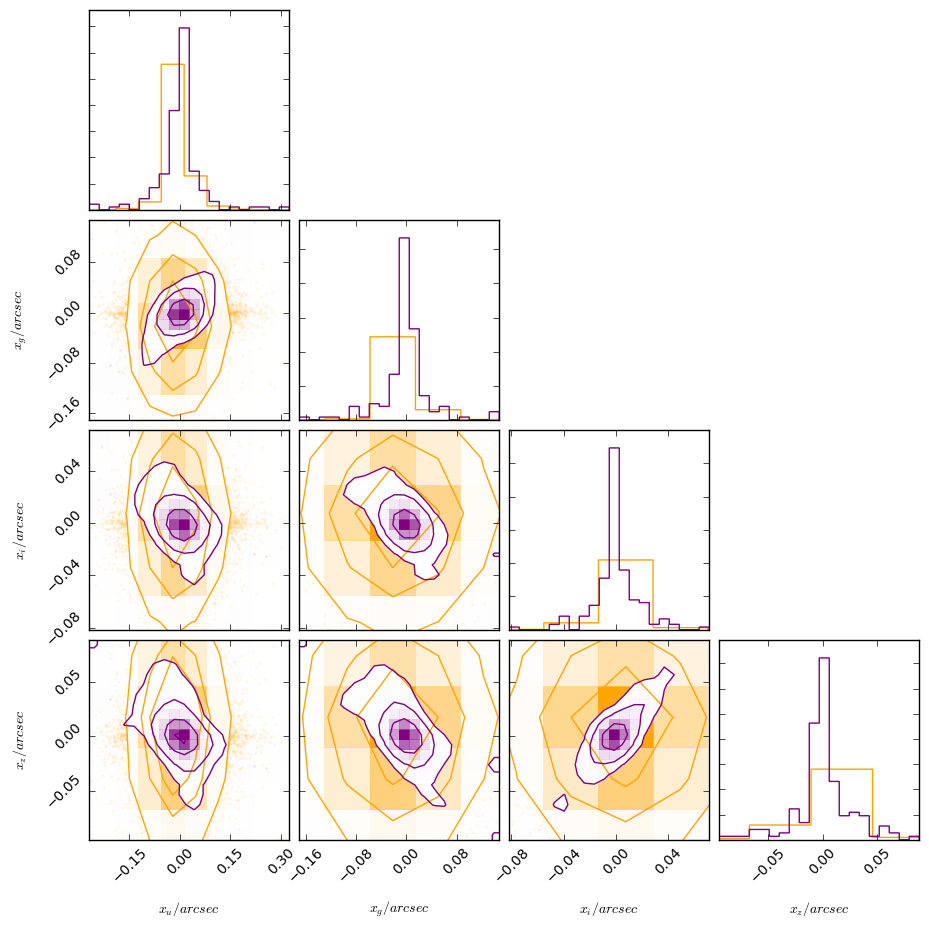

In [4]:
warnings.filterwarnings("ignore")
option = ['x_position']
fig1 = realizer.generate_cornerplot(object_table_dir='../../../data/sdss_object.csv', color='orange', option=option, galsim=True, normed=True)
fig = realizer.generate_cornerplot(object_table_dir='../../../data/object_catalog_galsim_noise.csv', color='purple', option=option, overlap=fig1, galsim=True, normed=True)

### III. First moment along the y axis

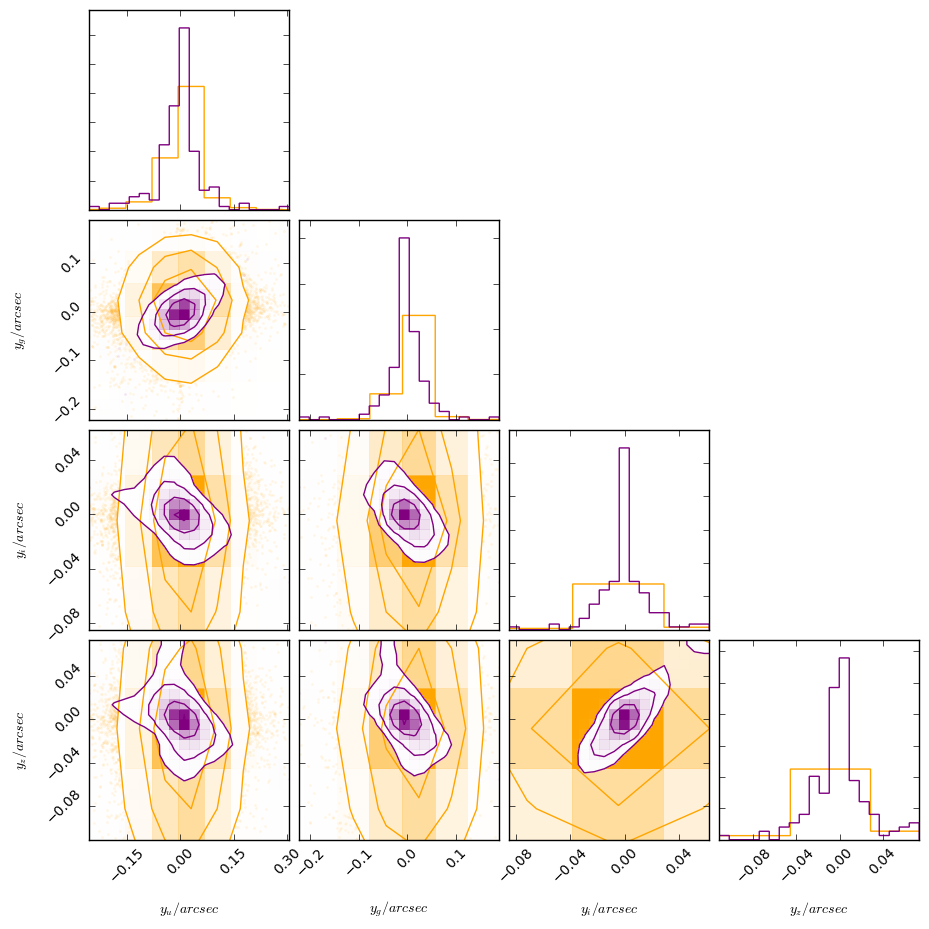

In [5]:
option = ['y_position']
fig1 = realizer.generate_cornerplot(object_table_dir='../../../data/sdss_object.csv', color='orange', option=option, galsim=True, normed=True)
fig = realizer.generate_cornerplot(object_table_dir='../../../data/object_catalog_galsim_noise.csv', color='purple', option=option, overlap=fig1, galsim=True, normed=True)

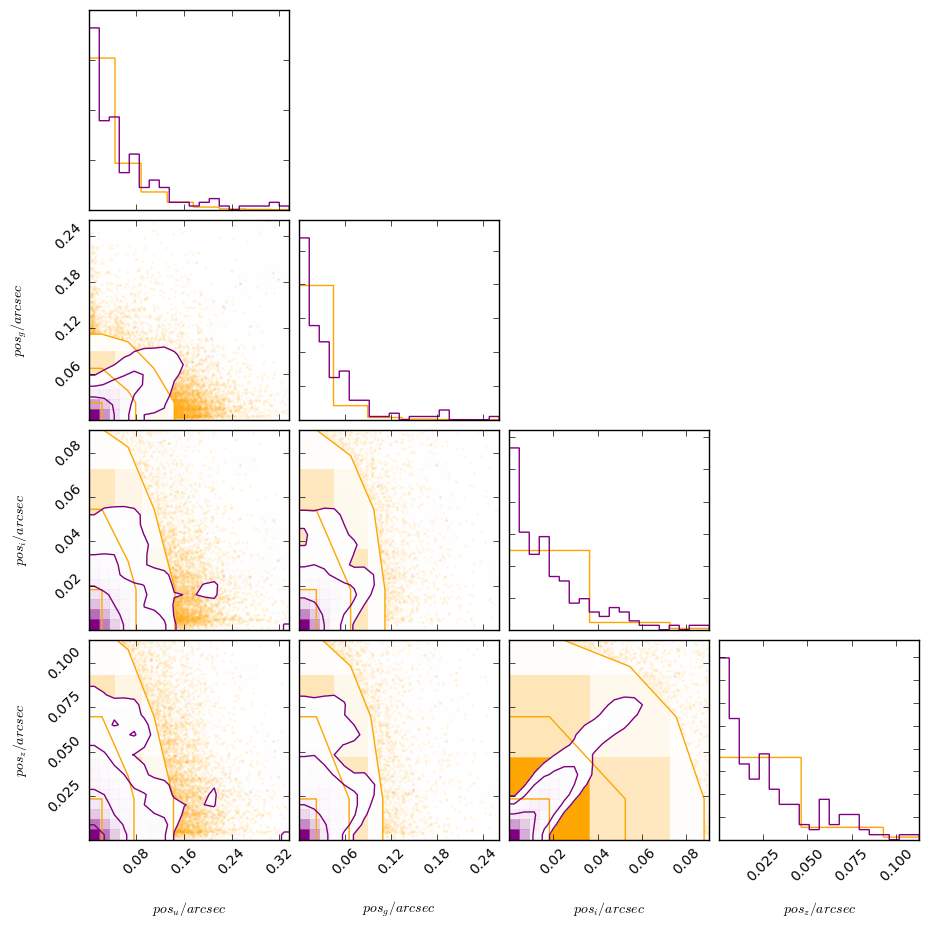

In [6]:
option = ['position']
fig1 = realizer.generate_cornerplot(object_table_dir='../../../data/sdss_object.csv', color='orange', option=option, galsim=True, normed=True)
fig = realizer.generate_cornerplot(object_table_dir='../../../data/object_catalog_galsim_noise.csv', color='purple', option=option, overlap=fig1, galsim=True, normed=True)

### IV. Ellipticity

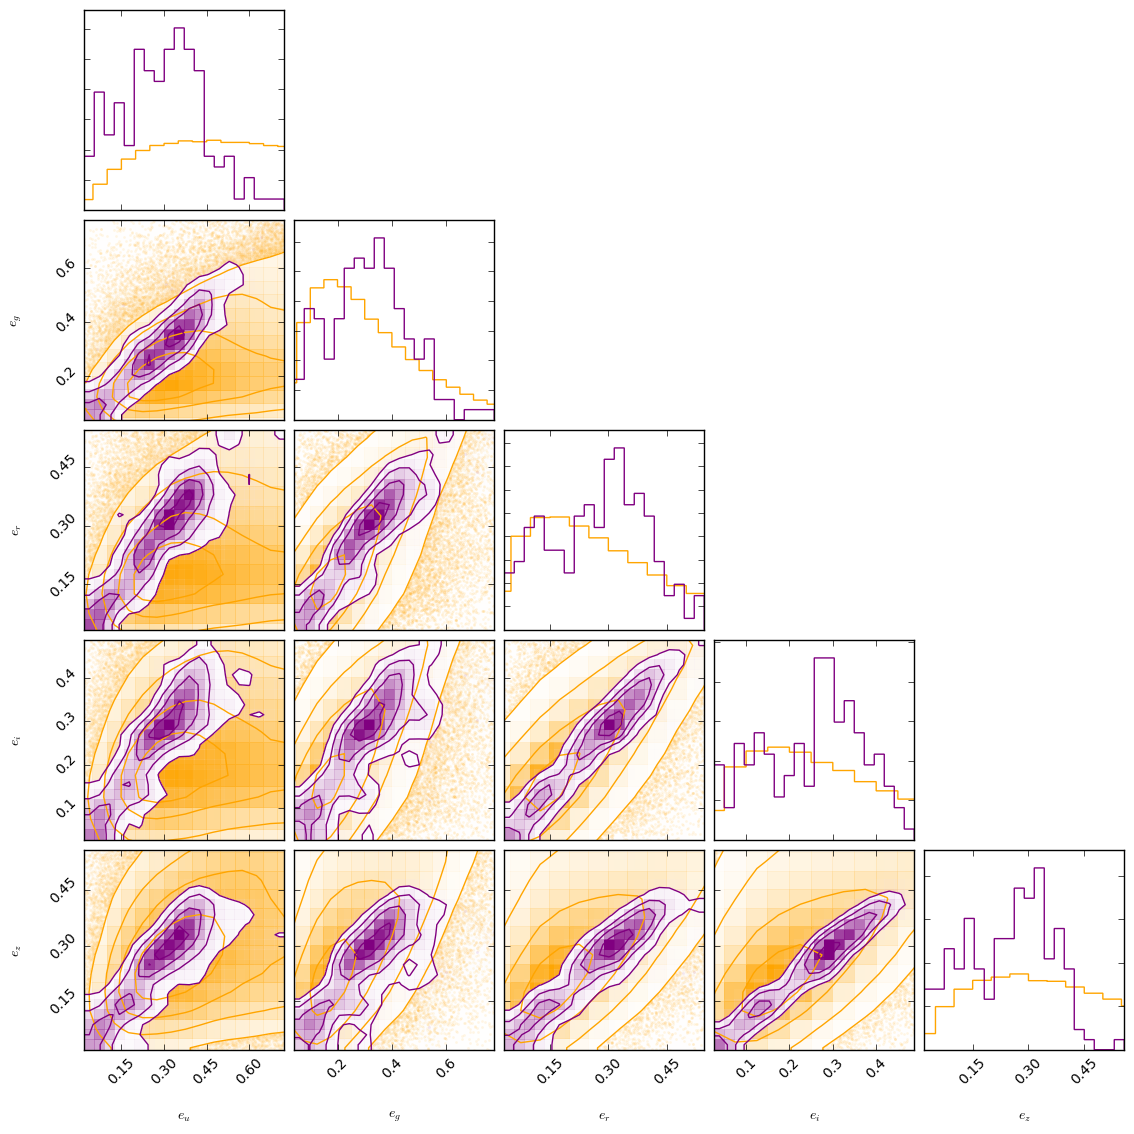

In [7]:
option = ['ellipticity']
fig1 = realizer.generate_cornerplot(object_table_dir='../../../data/sdss_object.csv', color='orange', option=option, galsim=True, normed=True, range=[(0, 1), (0, 1), (0, 1), (0, 1), (0, 1)])
fig = realizer.generate_cornerplot(object_table_dir='../../../data/object_catalog_galsim_noise.csv', color='purple', option=option, overlap=fig1, galsim=True, normed=True)

### V. Color

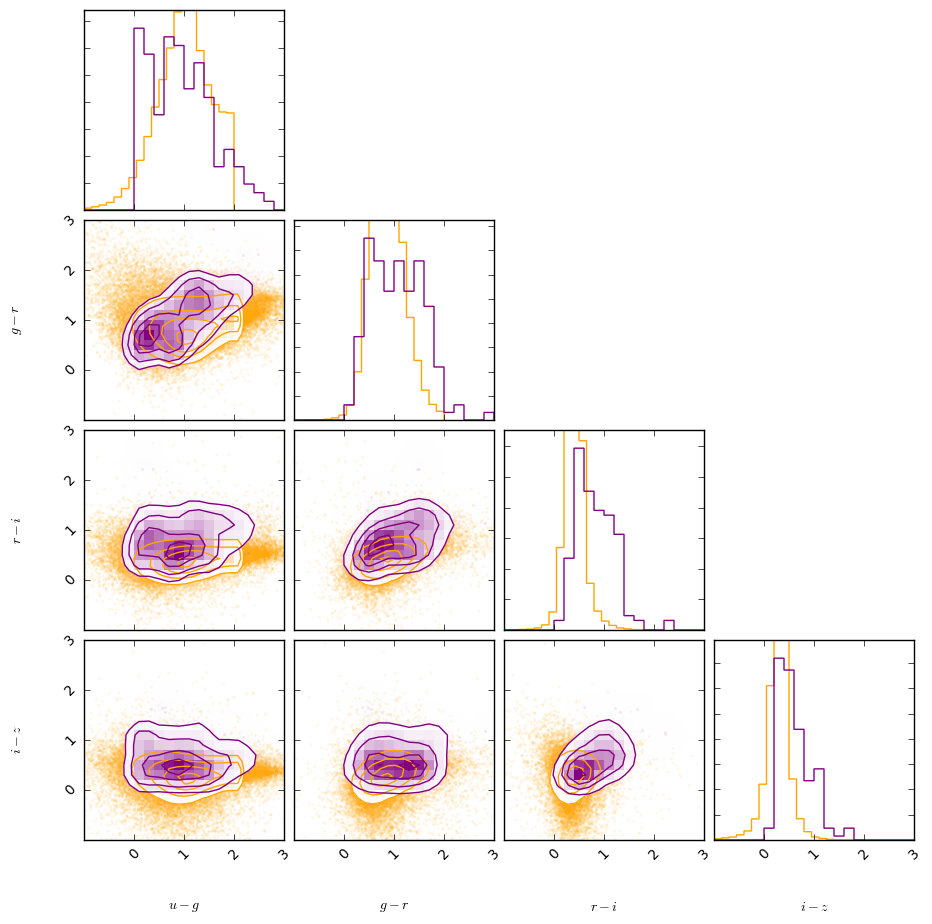

In [8]:
option = ['color']
fig1 = realizer.generate_cornerplot(object_table_dir='../../../data/sdss_object.csv', color='orange', option=option, galsim=True, normed=True, range=[(-1.0, 2.0), (-1.0, 2.0), (-1.0, 2.0), (-1.0, 2.0)])
fig = realizer.generate_cornerplot(object_table_dir='../../../data/object_catalog_galsim_noise.csv', color='purple', option=option, overlap=fig1, galsim=True, normed=True, range=[(-1.0, 3.0), (-1.0, 3.0), (-1.0, 3.0), (-1.0, 3.0)])

### VI. Size

In [9]:
option = ['size']
# This doesnt work
#fig1 = realizer.generate_cornerplot(object_table_dir='../../../data/sdss_object.csv', color='orange', normed=True, option=option, galsim=True)
#fig = realizer.generate_cornerplot(object_table_dir='../../../data/object_catalog_galsim_noise.csv', color='purple', option=option, overlap=fig1, normed=True, galsim=True)

### VII. Magnitude

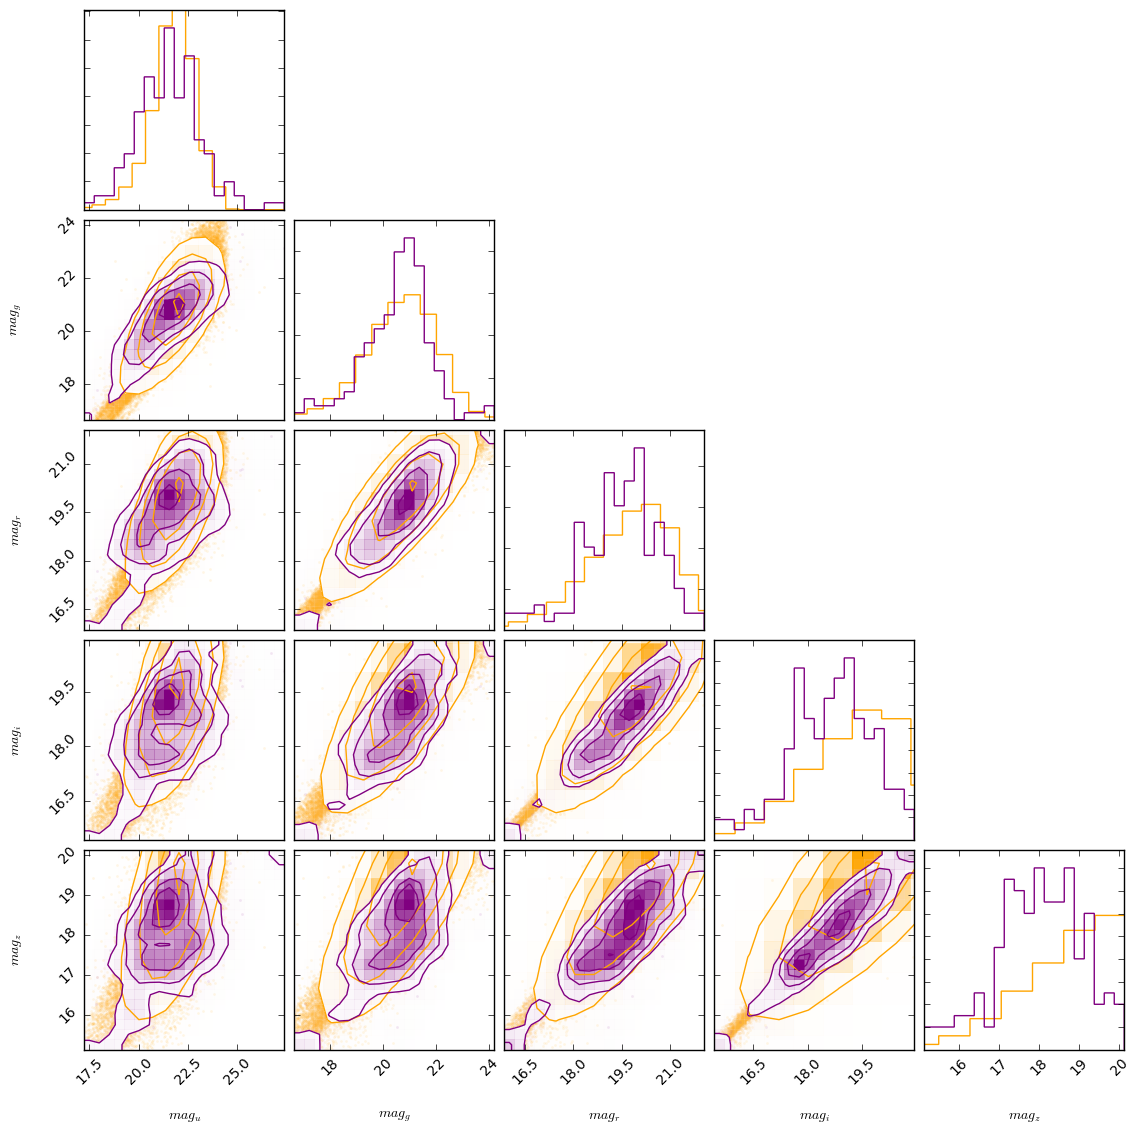

In [10]:
option = ['magnitude']
fig1 = realizer.generate_cornerplot(object_table_dir='../../../data/sdss_object.csv', color='orange', option=option, normed=True, galsim=True)
fig = realizer.generate_cornerplot(object_table_dir='../../../data/object_catalog_galsim_noise.csv', color='purple', option=option, overlap=fig1, normed=True, galsim=True)

### VII. Custom Options

We can enable the custom option -- we can just format the data and draw the cornerplot without using the default option. In order to do so, we have to import pandas, read th sdss and om10 object catalogs, and pass in the `custom` option.

In [11]:
# custom input
import pandas as pd
object_table = pd.read_csv('../../../data/object_catalog_galsim_noise.csv')
sdss_table = pd.read_csv('../../../data/sdss_object.csv')
option = ['custom']

#### Color index for u-r, r-z, and u-z magnitudes

[[ 1.61683814  0.90642148  2.52325961]
 [ 0.63995194  0.35075008  0.99070202]
 [ 2.58801458  0.75454546  3.34256004]
 ..., 
 [ 1.92728096  1.03864877  2.96592973]
 [ 1.24040886 -0.55752914  0.68287972]
 [ 1.33956404  0.11295593  1.45251997]]
custom input
custom input


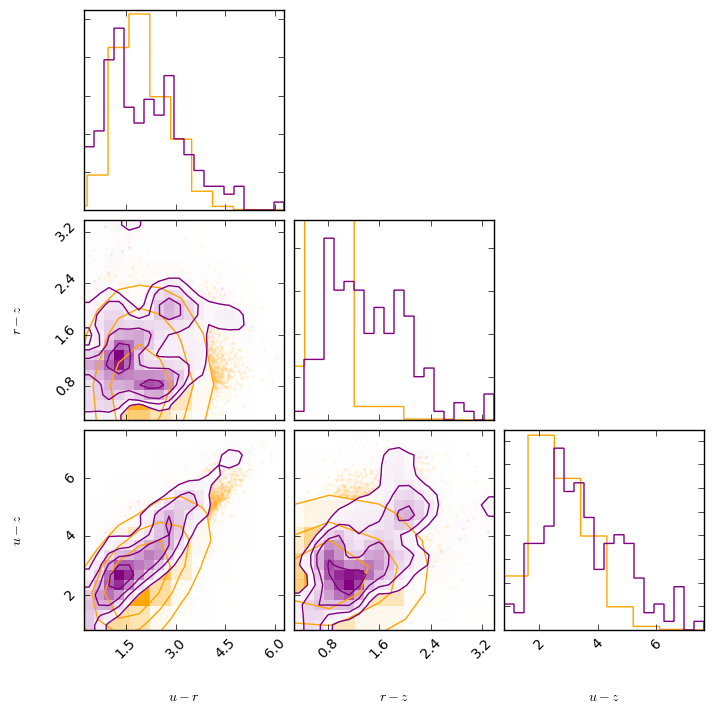

In [12]:
labels = ['$u-r$', '$r-z$', '$u-z$']
features = np.array([])
u = object_table['u_flux']
r = object_table['r_flux']
z = object_table['z_flux']
flux_mag_u = desc.slrealizer.return_zeropoint()-2.5*np.log10(u)
flux_mag_z = desc.slrealizer.return_zeropoint()-2.5*np.log10(z)
flux_mag_r = desc.slrealizer.return_zeropoint()-2.5*np.log10(r)
ur = flux_mag_u - flux_mag_r
rz = flux_mag_r - flux_mag_z
uz = flux_mag_u - flux_mag_z
features= np.append(features, ur)
features= np.append(features, rz)
features= np.append(features, uz)
features = features.reshape(3, len(ur)).transpose()
# sdss
u_sdss = sdss_table['u_flux']
r_sdss = sdss_table['r_flux']
z_sdss = sdss_table['z_flux']
features_sdss = np.array([])
flux_mag_u_sdss = desc.slrealizer.return_zeropoint()-2.5*np.log10(u_sdss)
flux_mag_z_sdss = desc.slrealizer.return_zeropoint()-2.5*np.log10(z_sdss)
flux_mag_r_sdss = desc.slrealizer.return_zeropoint()-2.5*np.log10(r_sdss)
ur_sdss = flux_mag_u_sdss - flux_mag_r_sdss
rz_sdss = flux_mag_r_sdss - flux_mag_z_sdss
uz_sdss = flux_mag_u_sdss - flux_mag_z_sdss
features_sdss= np.append(features_sdss, ur_sdss)
features_sdss= np.append(features_sdss, rz_sdss)
features_sdss= np.append(features_sdss, uz_sdss)
features_sdss = features_sdss.reshape(3, len(ur_sdss)).transpose()
print(features_sdss)

fig1 = realizer.generate_cornerplot(color='orange', option=option, 
                                    data=features_sdss, label=labels, galsim=True, normed=True)
fig = realizer.generate_cornerplot(color='purple', option=option, overlap=fig1, 
                                   galsim=True, data=features, label=labels, normed=True)


#### Color index for u-z, u-i, and g-z magnitudes

custom input
custom input


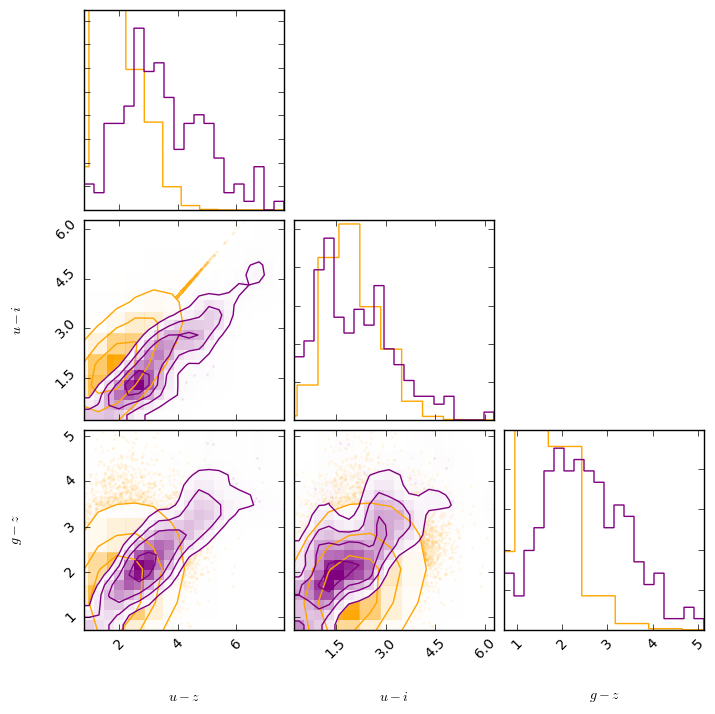

In [13]:
labels = ['$u-z$', '$u-i$', '$g-z$']
features = np.array([])
u = object_table['u_flux']
g = object_table['g_flux']
z = object_table['r_flux']
z = object_table['z_flux']
flux_mag_u = desc.slrealizer.return_zeropoint()-2.5*np.log10(u)
flux_mag_z = desc.slrealizer.return_zeropoint()-2.5*np.log10(z)
flux_mag_r = desc.slrealizer.return_zeropoint()-2.5*np.log10(r)
flux_mag_g = desc.slrealizer.return_zeropoint()-2.5*np.log10(g)
uz = flux_mag_u - flux_mag_z
ur = flux_mag_u - flux_mag_r
gz = flux_mag_g - flux_mag_z
features= np.append(features, uz)
features= np.append(features, ur)
features= np.append(features, gz)
features = features.reshape(3, len(u)).transpose()
# sdss
u_sdss = sdss_table['u_flux']
r_sdss = sdss_table['r_flux']
z_sdss = sdss_table['z_flux']
g_sdss = sdss_table['g_flux']
sdss_features = np.array([])
flux_mag_u_sdss = desc.slrealizer.return_zeropoint()-2.5*np.log10(u_sdss)
flux_mag_z_sdss = desc.slrealizer.return_zeropoint()-2.5*np.log10(z_sdss)
flux_mag_r_sdss = desc.slrealizer.return_zeropoint()-2.5*np.log10(r_sdss)
flux_mag_g_sdss = desc.slrealizer.return_zeropoint()-2.5*np.log10(g_sdss)
uz_sdss = flux_mag_u_sdss - flux_mag_r_sdss
ur_sdss = flux_mag_u_sdss - flux_mag_r_sdss
gz_sdss = flux_mag_g_sdss - flux_mag_z_sdss
sdss_features= np.append(sdss_features, uz_sdss)
sdss_features= np.append(sdss_features, ur_sdss)
sdss_features= np.append(sdss_features, gz_sdss)
sdss_features = sdss_features.reshape(3, len(u_sdss)).transpose()

fig1 = realizer.generate_cornerplot(color='orange', option=option, 
                                    data=sdss_features, label=labels, galsim=True, normed=True)
fig = realizer.generate_cornerplot(color='purple', option=option, overlap=fig1, 
                                   galsim=True, data=features, label=labels, normed=True)

In [14]:
#### Color index for u-z vs ellipticity

custom input
custom input


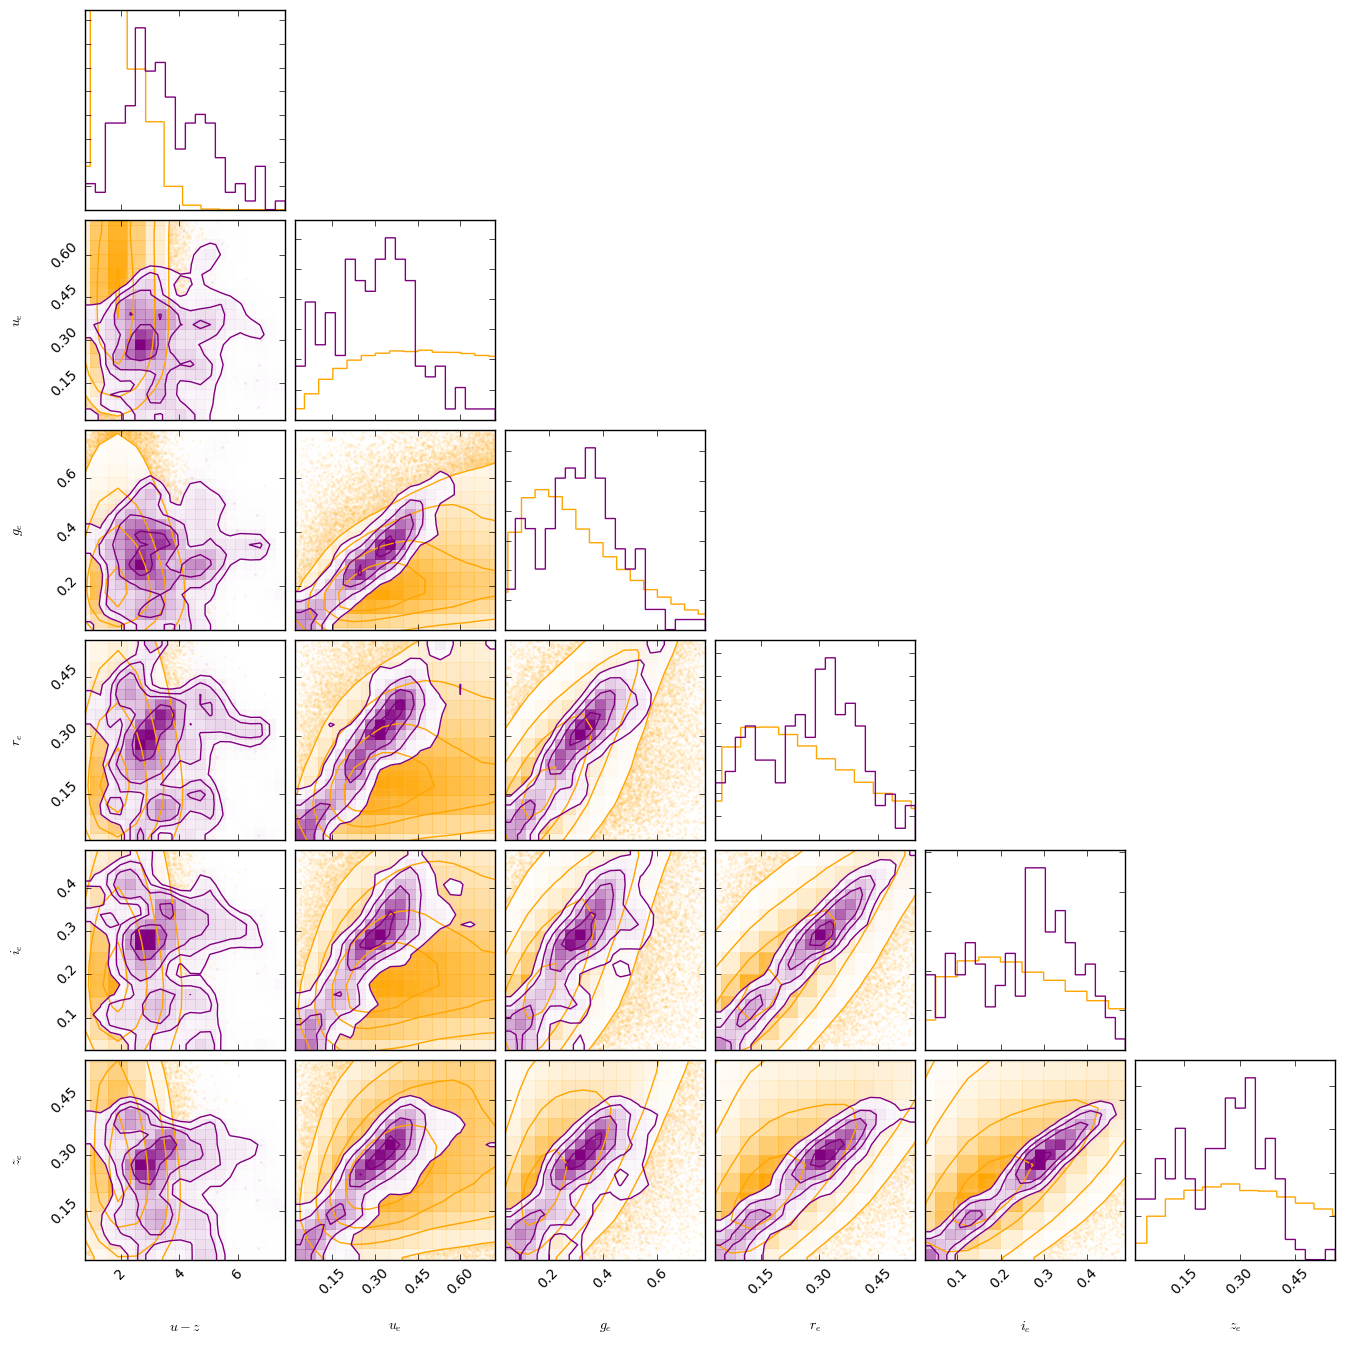

In [15]:
option = ['custom']
labels = ['$u-z$', '$u_e$', '$g_e$', '$r_e$', '$i_e$', '$z_e$']
features = np.array([])
u = object_table['u_flux']
z = object_table['z_flux']
flux_mag_u = desc.slrealizer.return_zeropoint()-2.5*np.log10(u)
flux_mag_z = desc.slrealizer.return_zeropoint()-2.5*np.log10(z)
uz = flux_mag_u - flux_mag_z
features= np.append(features, uz)
u_e = object_table['u_e']
g_e = object_table['g_e']
r_e = object_table['r_e']
i_e = object_table['i_e']
z_e = object_table['z_e']
features= np.append(features, u_e)
features= np.append(features, g_e)
features= np.append(features, r_e)
features= np.append(features, i_e)
features= np.append(features, z_e)
features = features.reshape(6, len(u)).transpose()
# sdss
u_sdss = sdss_table['u_flux']
z_sdss = sdss_table['z_flux']
sdss_features = np.array([])
flux_mag_u_sdss = desc.slrealizer.return_zeropoint()-2.5*np.log10(u_sdss)
flux_mag_z_sdss = desc.slrealizer.return_zeropoint()-2.5*np.log10(z_sdss)
uz_sdss = flux_mag_u_sdss - flux_mag_r_sdss
sdss_features= np.append(sdss_features, uz_sdss)
u_e_sdss = sdss_table['u_e']
g_e_sdss = sdss_table['g_e']
r_e_sdss = sdss_table['r_e']
i_e_sdss = sdss_table['i_e']
z_e_sdss = sdss_table['z_e']
sdss_features= np.append(sdss_features, u_e_sdss)
sdss_features= np.append(sdss_features, g_e_sdss)
sdss_features= np.append(sdss_features, r_e_sdss)
sdss_features= np.append(sdss_features, i_e_sdss)
sdss_features= np.append(sdss_features, z_e_sdss)
sdss_features = sdss_features.reshape(6, len(u_sdss)).transpose()

fig1 = realizer.generate_cornerplot(color='orange', option=option, 
                                    data=sdss_features, label=labels, galsim=True, normed=True)
fig = realizer.generate_cornerplot(color='purple', option=option, overlap=fig1, 
                                   galsim=True, data=features, label=labels, normed=True)

160
160
0      0.164160
1      0.107652
2      0.089443
3      0.603740
4      0.271515
5      0.166065
6      0.260466
7      0.162932
8      0.132741
9      0.053398
10     0.117846
11     0.077418
12     0.165005
13     0.139802
14     0.326644
15     0.121643
16     0.226635
17     0.125780
18     0.357268
19     0.036937
20     0.337195
21     0.320209
22     0.227949
23     0.066744
24     0.207463
25     0.055292
26     0.105490
27     0.066030
28     0.038727
29     0.185824
         ...   
130    0.221416
131    0.094437
132    0.192059
133    0.067014
134    0.070968
135    0.175282
136    0.258232
137    0.103599
138    0.092697
139    0.149185
140    0.264910
141    0.214896
142    0.030271
143    0.131794
144    0.309652
145    0.197200
146    0.461948
147    0.157727
148    0.220613
149    0.133396
150    0.156141
151    0.371531
152    0.517534
153    0.153591
154    0.063102
155    0.030151
156    0.082691
157    0.303883
158    0.315078
159    0.399712
dtype: float64
0

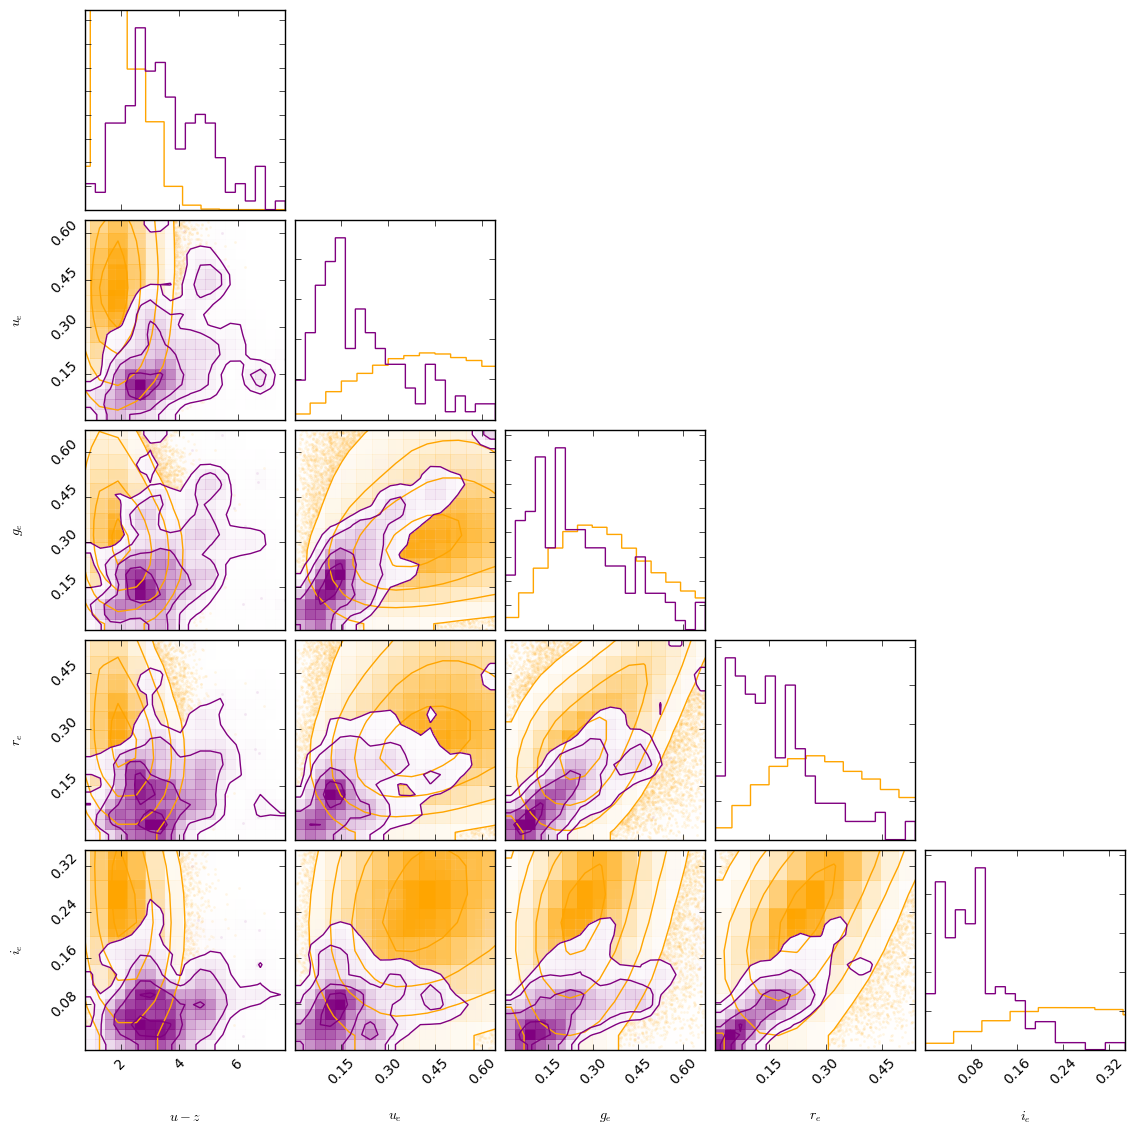

In [31]:
option = ['custom']
labels = ['$u-z$', '$u_e$', '$g_e$', '$r_e$', '$i_e$']
features = np.array([])
u = object_table['u_flux']
z = object_table['z_flux']
flux_mag_u = desc.slrealizer.return_zeropoint()-2.5*np.log10(u)
flux_mag_z = desc.slrealizer.return_zeropoint()-2.5*np.log10(z)
uz = flux_mag_u - flux_mag_z
print(len(uz))
features= np.append(features, uz)
u_e = np.sqrt(np.abs(object_table['u_e'] - object_table['z_e']))
print(len(u_e))
g_e = np.sqrt(np.abs(object_table['g_e'] - object_table['z_e']))
r_e = np.sqrt(np.abs(object_table['r_e'] - object_table['z_e']))
i_e = np.sqrt(np.abs(object_table['i_e'] - object_table['z_e']))
print(u_e)
print(g_e)
print(r_e)
print(i_e)
features= np.append(features, u_e)
features= np.append(features, g_e)
features= np.append(features, r_e)
features= np.append(features, i_e)
features = features.reshape(5, len(u_e)).transpose()

# sdss
u_sdss = sdss_table['u_flux']
z_sdss = sdss_table['z_flux']
sdss_features = np.array([])
flux_mag_u_sdss = desc.slrealizer.return_zeropoint()-2.5*np.log10(u_sdss)
flux_mag_z_sdss = desc.slrealizer.return_zeropoint()-2.5*np.log10(z_sdss)
uz_sdss = flux_mag_u_sdss - flux_mag_r_sdss
sdss_features= np.append(sdss_features, uz_sdss)
u_e_sdss = np.sqrt(np.abs(sdss_table['u_e'] - sdss_table['z_e']))
g_e_sdss = np.sqrt(np.abs(sdss_table['g_e'] - sdss_table['z_e']))
r_e_sdss = np.sqrt(np.abs(sdss_table['r_e'] - sdss_table['z_e']))
i_e_sdss = np.sqrt(np.abs(sdss_table['i_e'] - sdss_table['z_e']))

sdss_features= np.append(sdss_features, u_e_sdss)
sdss_features= np.append(sdss_features, g_e_sdss)
sdss_features= np.append(sdss_features, r_e_sdss)
sdss_features= np.append(sdss_features, i_e_sdss)
sdss_features = sdss_features.reshape(5, len(u_e_sdss)).transpose()

fig1 = realizer.generate_cornerplot(color='orange', option=option, 
                                    data=sdss_features, label=labels, galsim=True, normed=True)
fig = realizer.generate_cornerplot(color='purple', option=option, overlap=fig1, 
                                   galsim=True, data=features, label=labels, normed=True)

custom input
custom input


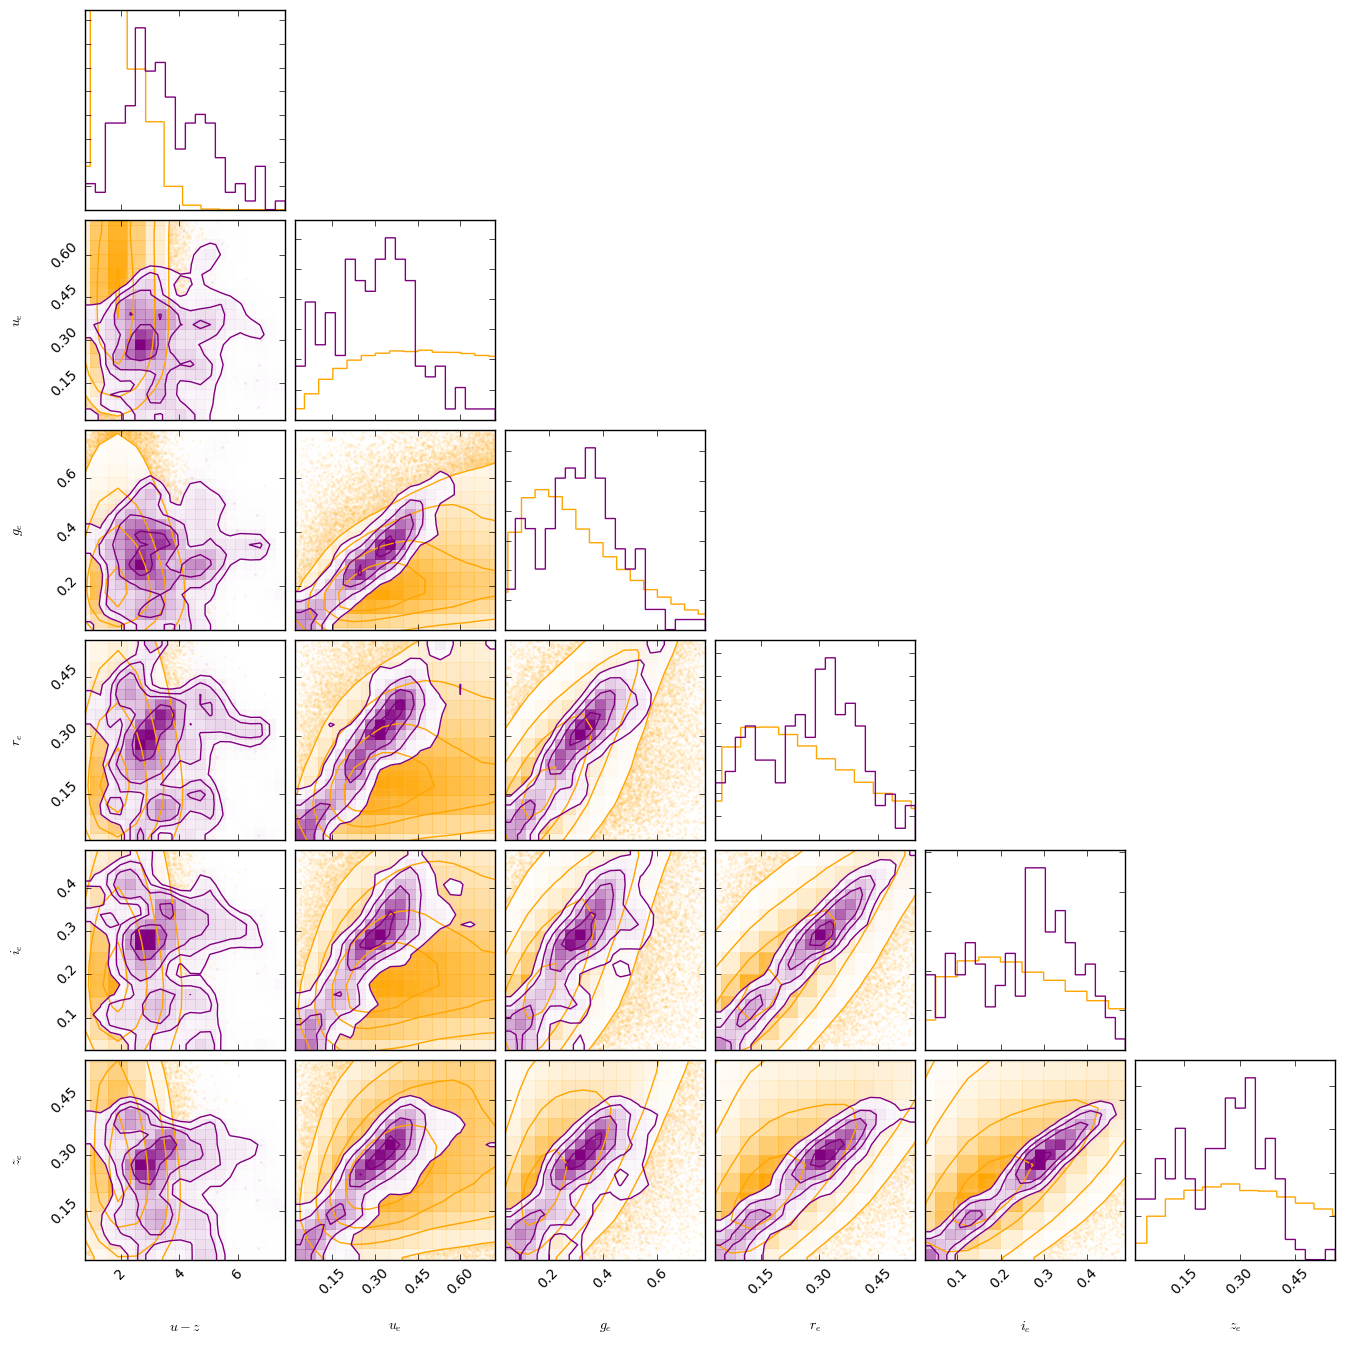

In [17]:
option = ['custom']
labels = ['$u-z$', '$u_e$', '$g_e$', '$r_e$', '$i_e$', '$z_e$']
features = np.array([])
u = object_table['u_flux']
z = object_table['z_flux']
flux_mag_u = desc.slrealizer.return_zeropoint()-2.5*np.log10(u)
flux_mag_z = desc.slrealizer.return_zeropoint()-2.5*np.log10(z)
uz = flux_mag_u - flux_mag_z
features= np.append(features, uz)
u_e = object_table['u_e']
g_e = object_table['g_e']
r_e = object_table['r_e']
i_e = object_table['i_e']
z_e = object_table['z_e']
features= np.append(features, u_e)
features= np.append(features, g_e)
features= np.append(features, r_e)
features= np.append(features, i_e)
features= np.append(features, z_e)
features = features.reshape(6, len(u)).transpose()
# sdss
u_sdss = sdss_table['u_flux']
z_sdss = sdss_table['z_flux']
sdss_features = np.array([])
flux_mag_u_sdss = desc.slrealizer.return_zeropoint()-2.5*np.log10(u_sdss)
flux_mag_z_sdss = desc.slrealizer.return_zeropoint()-2.5*np.log10(z_sdss)
uz_sdss = flux_mag_u_sdss - flux_mag_r_sdss
sdss_features= np.append(sdss_features, uz_sdss)
u_e_sdss = sdss_table['u_e']
g_e_sdss = sdss_table['g_e']
r_e_sdss = sdss_table['r_e']
i_e_sdss = sdss_table['i_e']
z_e_sdss = sdss_table['z_e']
sdss_features= np.append(sdss_features, u_e_sdss)
sdss_features= np.append(sdss_features, g_e_sdss)
sdss_features= np.append(sdss_features, r_e_sdss)
sdss_features= np.append(sdss_features, i_e_sdss)
sdss_features= np.append(sdss_features, z_e_sdss)
sdss_features = sdss_features.reshape(6, len(u_sdss)).transpose()

fig1 = realizer.generate_cornerplot(color='orange', option=option, 
                                    data=sdss_features, label=labels, galsim=True, normed=True)
fig = realizer.generate_cornerplot(color='purple', option=option, overlap=fig1, 
                                   galsim=True, data=features, label=labels, normed=True)

custom input
custom input


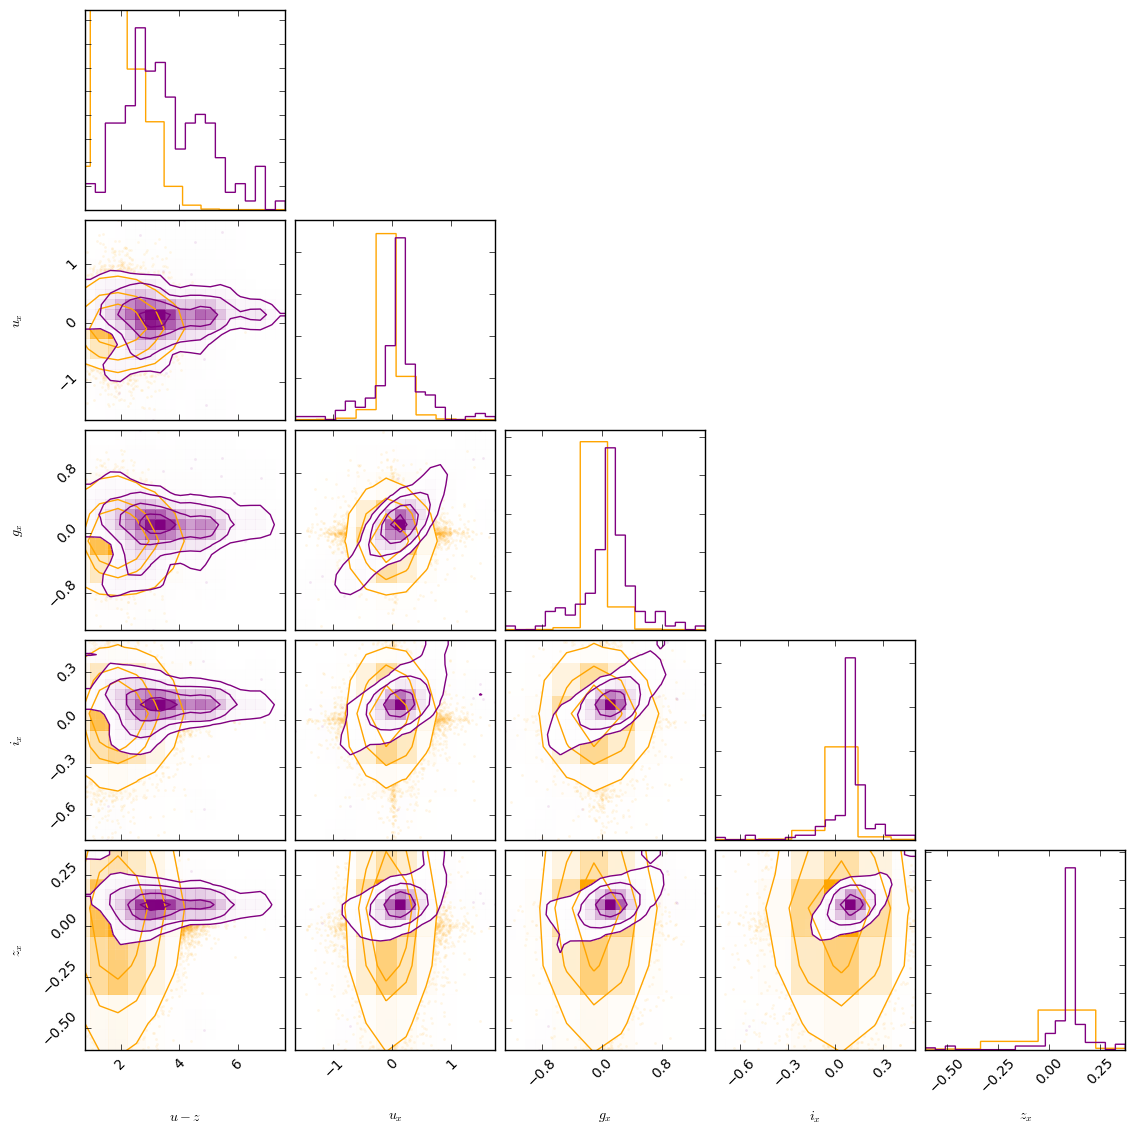

In [18]:
option = ['custom']
labels = ['$u-z$', '$u_x$', '$g_x$', '$i_x$', '$z_x$']
features = np.array([])
u = object_table['u_flux']
z = object_table['z_flux']
flux_mag_u = desc.slrealizer.return_zeropoint()-2.5*np.log10(u)
flux_mag_z = desc.slrealizer.return_zeropoint()-2.5*np.log10(z)
uz = flux_mag_u - flux_mag_z
features= np.append(features, uz)
u_x = object_table['u_x']
g_x = object_table['g_x']
i_x = object_table['i_x']
z_x = object_table['z_x']
features= np.append(features, u_x)
features= np.append(features, g_x)
features= np.append(features, i_x)
features= np.append(features, z_x)
features = features.reshape(5, len(u_x)).transpose()
# sdss
u_sdss = sdss_table['u_flux']
z_sdss = sdss_table['z_flux']
sdss_features = np.array([])
flux_mag_u_sdss = desc.slrealizer.return_zeropoint()-2.5*np.log10(u_sdss)
flux_mag_z_sdss = desc.slrealizer.return_zeropoint()-2.5*np.log10(z_sdss)
uz_sdss = flux_mag_u_sdss - flux_mag_r_sdss
sdss_features= np.append(sdss_features, uz_sdss)
u_x_sdss = sdss_table['u_x']
g_x_sdss = sdss_table['g_x']
i_x_sdss = sdss_table['i_x']
z_x_sdss = sdss_table['z_x']
sdss_features= np.append(sdss_features, u_x_sdss)
sdss_features= np.append(sdss_features, g_x_sdss)
sdss_features= np.append(sdss_features, i_x_sdss)
sdss_features= np.append(sdss_features, z_x_sdss)
sdss_features = sdss_features.reshape(5, len(u_x_sdss)).transpose()

fig1 = realizer.generate_cornerplot(color='orange', option=option, 
                                    data=sdss_features, label=labels, galsim=True, normed=True)
fig = realizer.generate_cornerplot(color='purple', option=option, overlap=fig1, 
                                   galsim=True, data=features, label=labels, normed=True)

custom input
custom input


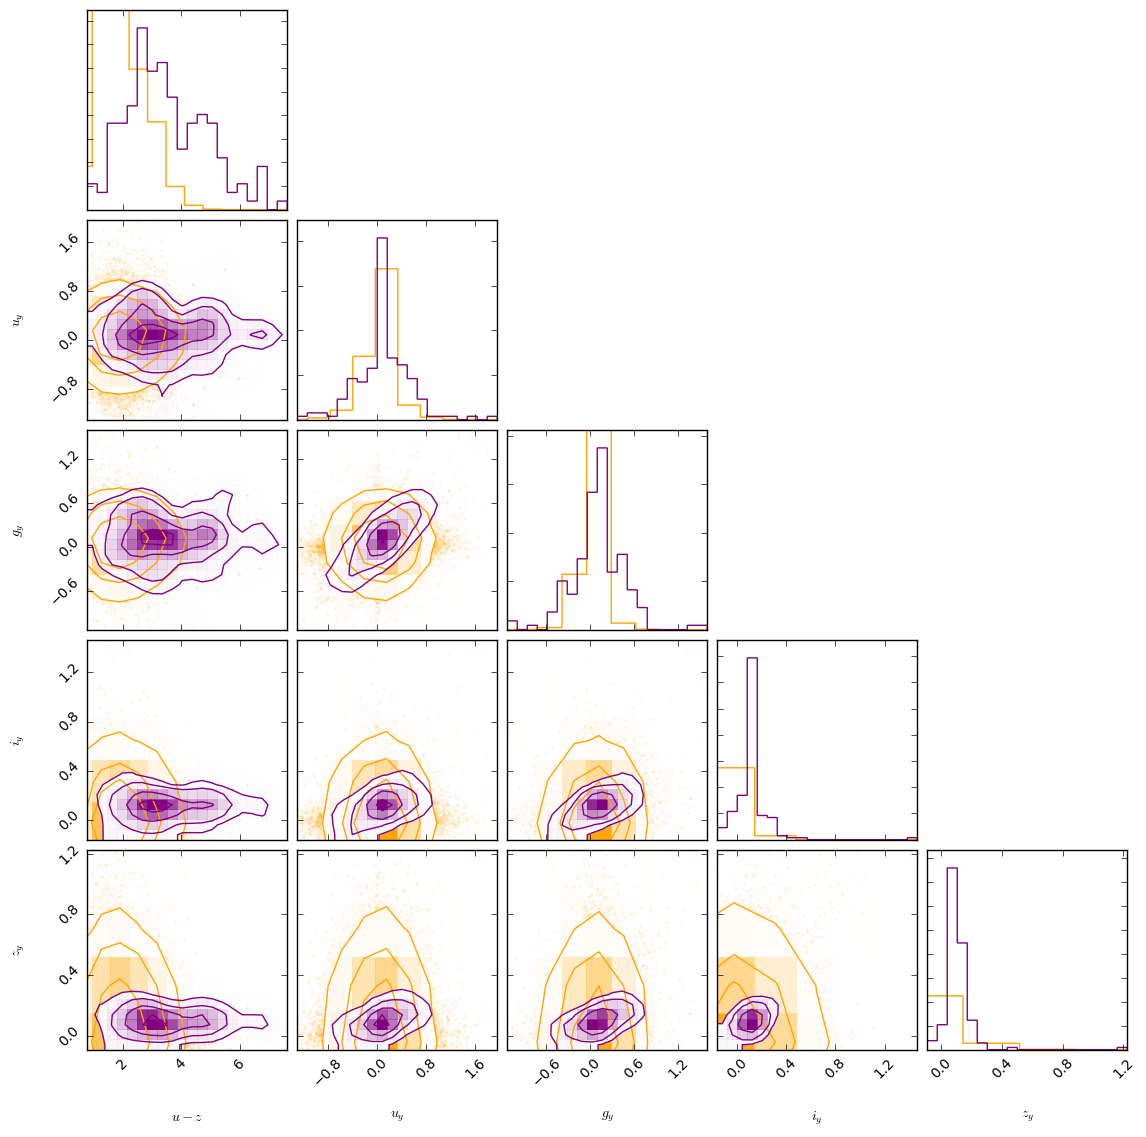

In [19]:
option = ['custom']
labels = ['$u-z$', '$u_y$', '$g_y$', '$i_y$', '$z_y$']
features = np.array([])
u = object_table['u_flux']
z = object_table['z_flux']
flux_mag_u = desc.slrealizer.return_zeropoint()-2.5*np.log10(u)
flux_mag_z = desc.slrealizer.return_zeropoint()-2.5*np.log10(z)
uz = flux_mag_u - flux_mag_z
features= np.append(features, uz)
u_x = object_table['u_y']
g_x = object_table['g_y']
i_x = object_table['i_y']
z_x = object_table['z_y']
features= np.append(features, u_x)
features= np.append(features, g_x)
features= np.append(features, i_x)
features= np.append(features, z_x)
features = features.reshape(5, len(u_x)).transpose()
# sdss
u_sdss = sdss_table['u_flux']
z_sdss = sdss_table['z_flux']
sdss_features = np.array([])
flux_mag_u_sdss = desc.slrealizer.return_zeropoint()-2.5*np.log10(u_sdss)
flux_mag_z_sdss = desc.slrealizer.return_zeropoint()-2.5*np.log10(z_sdss)
uz_sdss = flux_mag_u_sdss - flux_mag_r_sdss
sdss_features= np.append(sdss_features, uz_sdss)
u_x_sdss = sdss_table['u_y']
g_x_sdss = sdss_table['g_y']
i_x_sdss = sdss_table['i_y']
z_x_sdss = sdss_table['z_y']
sdss_features= np.append(sdss_features, u_x_sdss)
sdss_features= np.append(sdss_features, g_x_sdss)
sdss_features= np.append(sdss_features, i_x_sdss)
sdss_features= np.append(sdss_features, z_x_sdss)
sdss_features = sdss_features.reshape(5, len(u_x_sdss)).transpose()

fig1 = realizer.generate_cornerplot(color='orange', option=option, 
                                    data=sdss_features, label=labels, galsim=True, normed=True)
fig = realizer.generate_cornerplot(color='purple', option=option, overlap=fig1, 
                                   galsim=True, data=features, label=labels, normed=True)